In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("../data/train_data.csv")
df.isnull().sum()/df.shape[0]*100

Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000


In [38]:
# Convert Weight column to float
df["Weight"] = df["Weight"].astype(str)
df["Weight"] = df["Weight"].str.replace("kg", "", regex=False).str.strip().astype(float)

In [39]:
# One-hot encoding
categorical_cols = ["Company", "TypeName", "ScreenResolution", 
                    "Cpu", "Ram", "Memory", "Gpu", "OpSys"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

df.head()

,Inches,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,15.6,2.50,52161.120,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,14.0,1.50,14811.840,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,15.6,2.20,14646.672,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,14.0,1.42,150462.720,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,15.6,2.40,23976.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


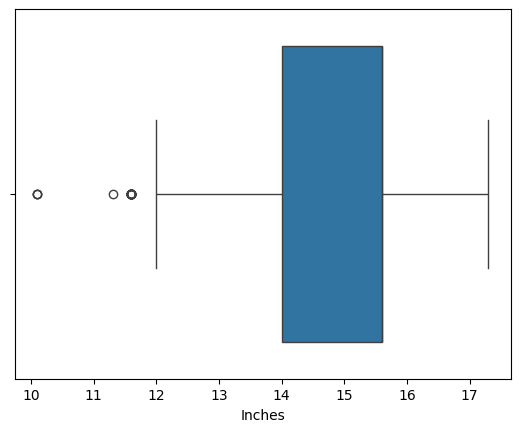

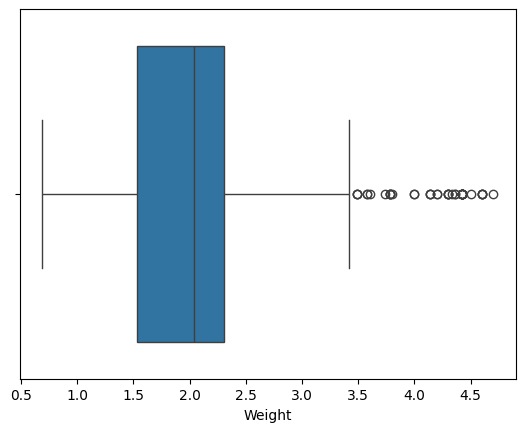

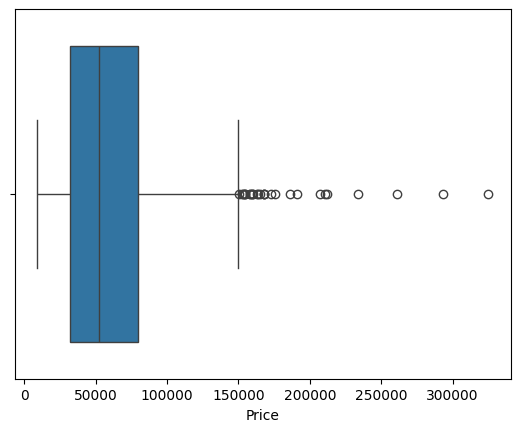

In [42]:
import warnings 
warnings.filterwarnings("ignore")
for i in ['Inches', 'Weight', 'Price']:
    sns.boxplot(data=df, x=i)
    plt.show()

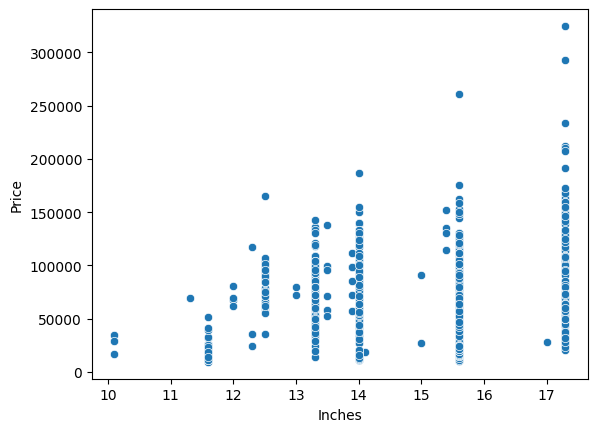

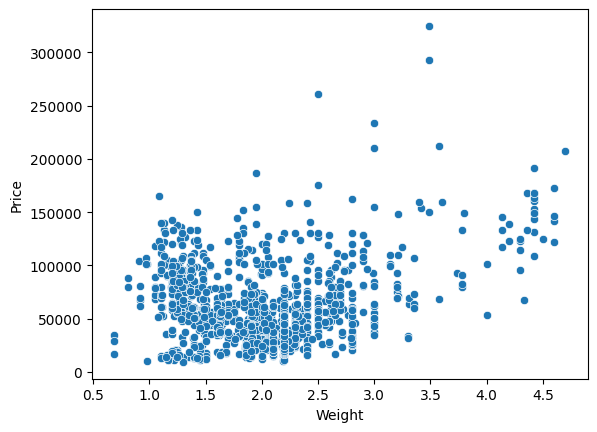

In [ ]:
for i in ['Inches', 'Weight']:
    sns.scatterplot(data=df, x=i, y='Price')
    plt.show()

In [46]:
#Outlier remover
def whisker(col):
    Q1,Q3 = np.percentile(col,[25,75])
    iqr = Q3 - Q1
    lw = Q1 - (1.5 * iqr)
    uw = Q3 + (1.5 * iqr)
    return lw, uw

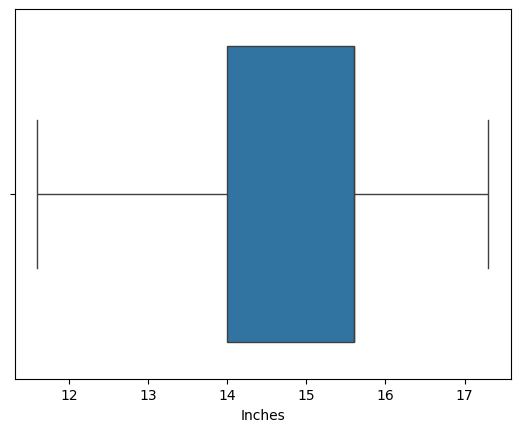

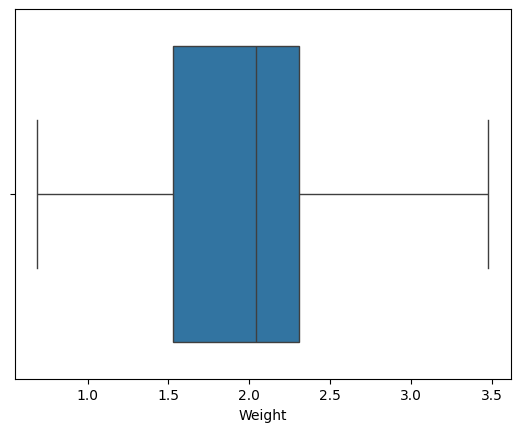

In [47]:
for i in ['Inches', 'Weight']:
    lw,uw = whisker(df[i])
    df[i] = np.where(df[i]<lw, lw, df[i])
    df[i] = np.where(df[i]>uw, uw, df[i])
    sns.boxplot(data=df, x=i)
    plt.show()

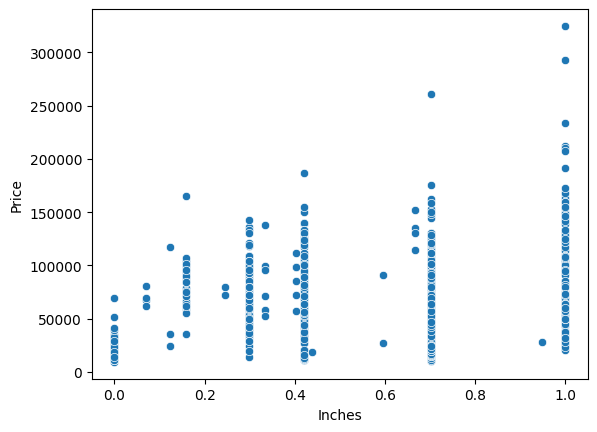

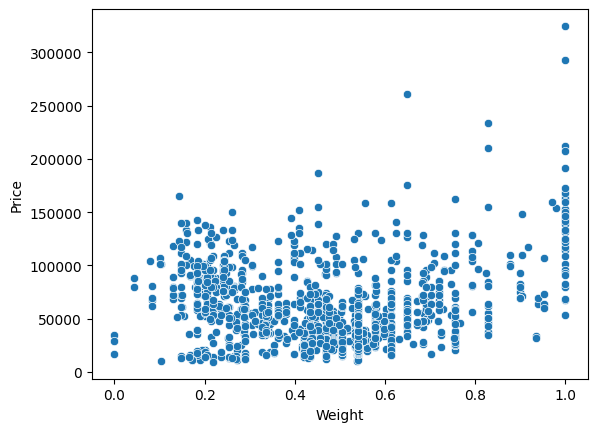

In [51]:
# Data normalization
for col in ['Inches', 'Weight']:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

for i in ['Inches', 'Weight']:
    sns.scatterplot(data=df, x=i, y='Price')
    plt.show()